# 0. Emission region

The emission region is the essential component of all radiative processes, as it contains the electron energy distribution (EED). The only emission region currently implemented in `agnpy` is a spherical plasmoid. In this notebook we will illustrate how to define it and how to use its properties.

In [1]:
# import numpy, astropy and matplotlib for basic functionalities
import astropy.units as u
from astropy.coordinates import Distance
import matplotlib.pyplot as plt

In [2]:
# import agnpy classes
from agnpy.emission_regions import Blob
from agnpy.utils.plot import load_mpl_rc

load_mpl_rc()  # adopt agnpy plotting style

## 0.1. Definition of a blob and basic properties
To initialize a blob we need to set the parameters of the EED and the physical attributes of the plasmoid. 

The EED represents the volume density of electrons as a function of their Lorentz factor $\gamma$. It is typically described by an analytical function of $\gamma$; for example, for a power-law EED

\begin{equation}
n_{\rm e}(\gamma) = k_{\rm e}\,\gamma^{-p} \, H(\gamma; \gamma_{\rm min}, \gamma_{\rm max}),
\end{equation}

where $k_{\rm e}$ is an amplitude in ${\rm cm}^{-3}$, $p$ the spectral index, and the Heaviside function ensures null values outside the range $[\gamma_{\rm min}, \gamma_{\rm max}]$. In the package the EED is specified through a normalization constant (it can be the total energy, volume or energy density of particles) and a dictionary defining its spectrum type and parameters.

The attributes of the blob are its size $R_{\rm b}$, the tangled magnetic field $B$, the Lorentz and Doppler factors with which it is streaming along the jet, $\Gamma$ and $\delta_{\rm D}$, respectively, and the distance at which the galaxy hosting the jet sits, $z$.

In [3]:
# set the spectrum normalisation (total energy in electrons in this case)
spectrum_norm = 1e48 * u.Unit("erg")

# dictionary defining the EED paramaters
# in this case we consider a simple power law
spectrum_pars = {"p": 2.8, "gamma_min": 1e2, "gamma_max": 1e7}
spectrum_dict = {"type": "PowerLaw", "parameters": spectrum_pars}

# set the remaining quantities defining the blob
R_b = 1e16 * u.cm
B = 1 * u.G
z = Distance(1e27, unit=u.cm).z
delta_D = 10
Gamma = 10

blob = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)

All the `agnpy` emitters can be printed to check their properties.

In [4]:
print(blob)

* spherical emission region
 - R_b (radius of the blob): 1.00e+16 cm
 - V_b (volume of the blob): 4.19e+48 cm3
 - z (source redshift): 0.07
 - d_L (source luminosity distance):1.00e+27 cm
 - delta_D (blob Doppler factor): 1.00e+01
 - Gamma (blob Lorentz factor): 1.00e+01
 - Beta (blob relativistic velocity): 9.95e-01
 - theta_s (jet viewing angle): 5.74e+00 deg
 - B (magnetic field tangled to the jet): 1.00e+00 G
 - xi (coefficient for 1st order Fermi acceleration) : 1.00e+00
* electron spectrum
 - power law
 - k_e: 9.27e+06 1 / cm3
 - p: 2.80
 - gamma_min: 1.00e+02
 - gamma_max: 1.00e+07


Since the blob contains the EED, we can visualize it.

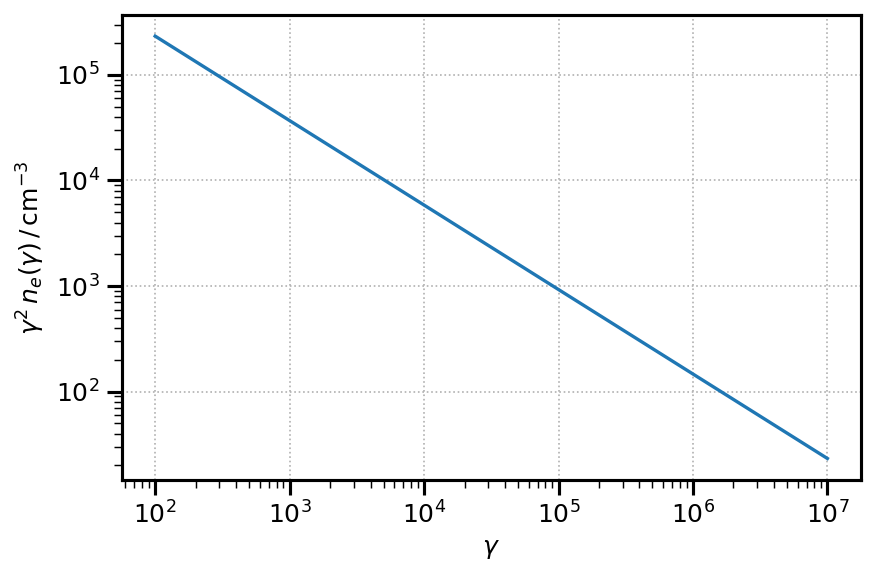

In [5]:
# plot the electron distribution
blob.plot_n_e(gamma_power=2)
plt.show()

The blob instance contains more quantities than those we specified to initialize it. Once created, we can check, for example:

In [6]:
print("total particle number:", blob.N_e_tot)
print("total energy density:", blob.n_e_tot)
print("total energy in electrons:", blob.W_e)

total particle number: 5.4376042143641014e+51
total energy density: 1298.1323839400534 1 / cm3
total energy in electrons: 1e+48 erg


As we can see, the last value is the same value we set up to normalize the EED.

We can also check the jet power in electrons $P_{\rm jet, e}$ (the total kinetic power of the particles) and in magnetic field $P_{\rm jet, B}$ (the power needed to expel a magnetic-field-laden plasma). The equilibrium between these two quantities defines a condition referred to as *equipartition*.

In [7]:
blob.P_jet_e

<Quantity 4.47434594e+44 erg / s>

In [8]:
blob.P_jet_B

<Quantity 7.45724324e+43 erg / s>

## 0.2. Initialize the blob with different normalizations
We now normalize the EED with its total particle number density $n_{\rm e, tot} ({\rm cm}^{-3})$. We will use two different normalization methods:
* `differential`, set the $k_{\rm e}$ of the EED (see Eq. above) to the number we specify;
* `integral`, set $n_{e, \rm tot}$ to the value we specify.

In [9]:
# spectrum normalisation and parameters, let us use a log-parabola EED this time
spectrum_norm = 1e2 * u.Unit("cm-3")

spectrum_pars = {
    "p": 2.3,
    "q": 0.1,
    "gamma_0": 1e4,
    "gamma_min": 10,
    "gamma_max": 1e7,
}

spectrum_dict = {"type": "LogParabola", "parameters": spectrum_pars}

In [10]:
# let us initialise one blob with the differential normalisation mode
blob_norm_diff = Blob(
    R_b,
    z,
    delta_D,
    Gamma,
    B,
    spectrum_norm,
    spectrum_dict,
    spectrum_norm_type="differential",
)
# and the other with the integral normalisation mode
blob_norm_int = Blob(
    R_b,
    z,
    delta_D,
    Gamma,
    B,
    spectrum_norm,
    spectrum_dict,
    spectrum_norm_type="integral",
)

Let us check that the value we specified was correctly set in both cases, then we can also see the difference in both electron distributions by plotting them.

In [11]:
print("amplitude of the EED with differential norm:", blob_norm_diff.n_e.k_e)
print("total particle density of the EED with integral norm:", blob_norm_int.n_e_tot)

amplitude of the EED with differential norm: 100.0 1 / cm3
total particle density of the EED with integral norm: 100.0 1 / cm3


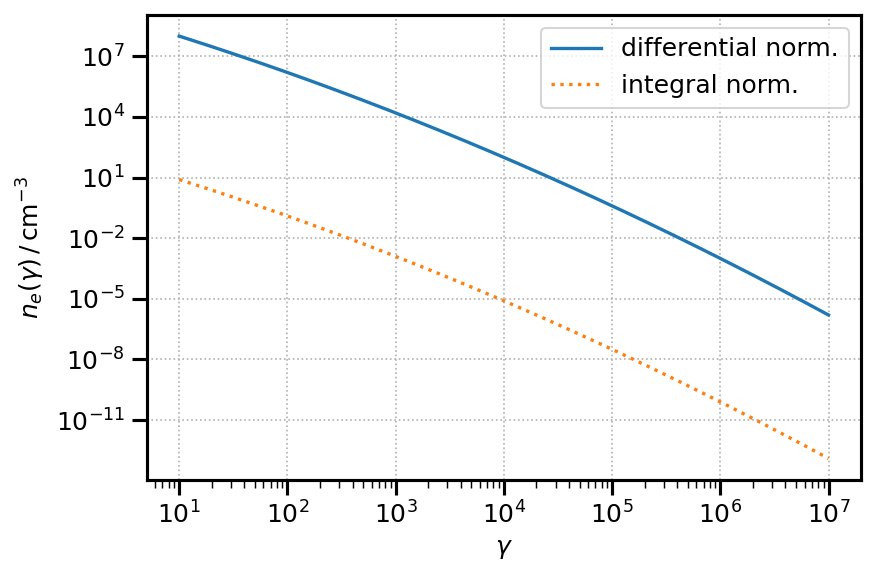

In [12]:
blob_norm_diff.plot_n_e(label="differential norm.")
blob_norm_int.plot_n_e(label="integral norm.", ls=":")
plt.legend()
plt.show()